In [1]:
import pandas as pd
#범주형 데이터의 실수화 함수 임포트
from sklearn.preprocessing import LabelEncoder 
#더미변수 생성, 가변환 함수 임포트
from sklearn.preprocessing import OneHotEncoder 

In [2]:
#데이터set 생성
x_train = pd.DataFrame(["남성", "여성", "남성", "여성", "남성", "여성"], columns=["성별"])

x_train.head(3)

,성별
0,남성
1,여성
2,남성


In [3]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   성별      6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [4]:
#범주형 데이터의 갯수 확인
x_train['성별'].value_counts()

남성    3
여성    3
Name: 성별, dtype: int64

In [5]:
#레이블 인코더 생성
encoding = LabelEncoder()

#피팅하고 레이블 숫자로 변환
encoding.fit(x_train["성별"])
x_train["성별_인코딩"] = encoding.transform(x_train["성별"])

In [6]:
x_train

,성별,성별_인코딩
0,남성,0
1,여성,1
2,남성,0
3,여성,1
4,남성,0
5,여성,1


In [7]:
print(list(encoding.classes_))

#인코딩 값으로 문자값 확인
print(list(encoding.inverse_transform([1,0])))

['남성', '여성']
['여성', '남성']


In [8]:
x_train.head(2)

,성별,성별_인코딩
0,남성,0
1,여성,1


In [9]:
#원핫인코더 생성
#sparse 를 True로 할 경우 행, 열 1 의 좌표리스트 형식, False 로 할 경우 넘파이 배열로 변환
one_encoding = OneHotEncoder(sparse=False)

#데이터 피팅
one_encoding.fit(x_train[["성별"]])

#가변환값 변환
one_encoding.transform(x_train[["성별"]])


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [10]:
#가변환된거 확인
print(one_encoding.get_feature_names())

['x0_남성' 'x0_여성']


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
#가변환된걸 x_train_one 데이터 프레임으로 저장
x_train_one = pd.DataFrame(one_encoding.transform(x_train[['성별']]),
                          columns=['성별0', '성별1'])

In [12]:
#x_train 데이터와 x_train_one 의 가변환된 속성 합침
x_train = pd.concat([x_train, x_train_one], axis=1)

In [13]:
x_train.head(3)

,성별,성별_인코딩,성별0,성별1
0,남성,0,1.0,0.0
1,여성,1,0.0,1.0
2,남성,0,1.0,0.0


In [16]:
#빈도수를 카운트하여 단어 수치화하는 CountVectorizer함수(Bag of words로 인코딩함)
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
corpus = ['청년 인재 개발 양성 과정', '인공지능 청년 양성', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [18]:
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [19]:
type(corpus)

list

In [21]:
#카운트 백터라이저 생성
count_vect = CountVectorizer()

#단어 카운트시키기
count_vect.fit(corpus)

count_vect.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [23]:
#단어 벡터화할 값을 array 로 변환해 확인
count_vect.transform(corpus).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [24]:
#단어 벡터화
features =count_vect.transform(corpus)

In [25]:
features

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [26]:
#속성 이름만 반환
vocab = count_vect.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
vocab

['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [28]:
#문서단어행렬(DTM)을 데이터 프레임으로 변환
DTM = pd.DataFrame(features.toarray(), columns=vocab).head()

In [29]:
DTM

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,1,1,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,1,0,1,0,1
2,0,0,0,1,1,1,0,0,1,0,0
3,1,0,1,0,1,0,0,1,0,0,1


In [30]:
#문서 단어 행렬에 일치하는 단어 확인
count_vect.transform(['기술사 대한민국 인재 만세']).toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [31]:
#TfidVectorizer 함수 : TF-IDf 방식으ㅡ로 단어의 가중치를 조정한 BOW로 인코딩하는 함수
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
#단어의 빈도수 수치화에서 활용한 corpus 데이터셋 사용
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [34]:
#텍스트 실수화 : TF-IDF방식
tfid = TfidfVectorizer()

#단어 카운트
tfid.fit(corpus)

#단어사전 확인
tfid.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [35]:
#단어 벡터화한 값을 array로 변환해 확인
tfid.transform(corpus).toarray()

array([[0.41263976, 0.52338122, 0.        , 0.        , 0.        ,
        0.        , 0.41263976, 0.        , 0.        , 0.52338122,
        0.33406745],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.61366674, 0.        , 0.61366674, 0.        ,
        0.49681612],
       [0.        , 0.        , 0.        , 0.55528266, 0.43779123,
        0.55528266, 0.        , 0.        , 0.43779123, 0.        ,
        0.        ],
       [0.41263976, 0.        , 0.52338122, 0.        , 0.41263976,
        0.        , 0.        , 0.52338122, 0.        , 0.        ,
        0.33406745]])

In [36]:
#단어 벡터화
features_idf = tfid.transform(corpus)

In [37]:
features_idf

<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [39]:
#속성 이름만 반환
vocab_idf = count_vect.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
vocab_idf

['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [41]:
#문서단어행렬(DTM)을 데이터 프레임으로 변환
DTM_idf = pd.DataFrame(features_idf.toarray(), columns= vocab_idf).head()

In [42]:
DTM_idf

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,0.41264,0.523381,0.000000,0.000000,0.000000,0.000000,0.412640,0.000000,0.000000,0.523381,0.334067
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.613667,0.000000,0.613667,0.000000,0.496816
2,0.00000,0.000000,0.000000,0.555283,0.437791,0.555283,0.000000,0.000000,0.437791,0.000000,0.000000
3,0.41264,0.000000,0.523381,0.000000,0.412640,0.000000,0.000000,0.523381,0.000000,0.000000,0.334067


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #matplotlib= 데이터를 차트나 플롯으로 그려주는 시각화 패키지
import seaborn as sns #seaborn = matplotlib 기반 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지

#OS 에 따른 폰트 깨짐 제거
import os
if os.name == 'nt' : 
    font_family = "Malgun Gothic"
else : font_family = "AppleGothic"
  
#- 값이 깨지는 문제 해결을 위해 파라미터 값을 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

#sklearn의 열의 평균이나 중앙값, 최빈값으로 대체하게 해주는 클래스
from sklearn.impute import SimpleImputer
from sklearn import linear_model

In [46]:
 #실습 데이터 생성
    temp_dict = {'A열' : [np.nan, 4,6,5,5,np.nan],
            'B열' : ['a','a',np.nan,'b','b','b'],
            'C열' : [np.nan,3.5,-1.5,np.nan,5.5,np.nan],
            'D열' : [1,0,1,0,1,1]}
missing_data = pd.DataFrame(temp_dict)
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [47]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A열      4 non-null      float64
 1   B열      5 non-null      object 
 2   C열      3 non-null      float64
 3   D열      6 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [48]:
#isnull 함수 이용으로 결측값 확인(True=결측값)
missing_data.isnull()

,A열,B열,C열,D열
0,True,False,True,False
1,False,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False
5,True,False,True,False


In [49]:
#결측값 갯수 확인
missing_data.isnull().sum()

A열    2
B열    1
C열    3
D열    0
dtype: int64

In [50]:
#속성별 결측값 갯수 확인 'A'열의 결측값 갯수확인
print(missing_data['A열'].isnull().sum())
print(missing_data['B열'].isnull().sum())
print(missing_data['C열'].isnull().sum())
print(missing_data['D열'].isnull().sum())

2
1
3
0


<AxesSubplot:>

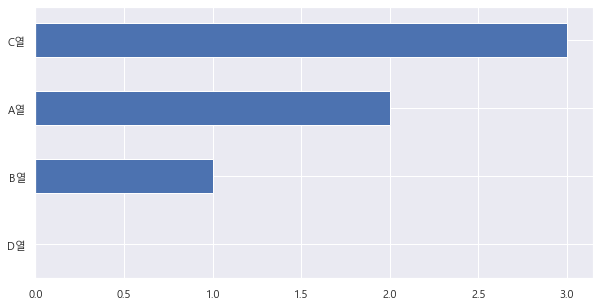

In [51]:
#결측값 시각화 = 결측값이 많은 속성 순으로 정렬
missing_data.isnull().sum().sort_values().plot.barh(figsize =(10,5))

In [53]:
#dropna = column 내에 결측값이 있으면 삭제하는 함수
missing_data.dropna(axis = 0)

,A열,B열,C열,D열
1,4.0,a,3.5,0
4,5.0,b,5.5,1


In [52]:
missing_data.dropna(axis = 1)

,D열
0,1
1,0
2,1
3,0
4,1
5,1


In [54]:
#thresh 파라미터 이용, 결측값 갯수가 n개 미만 존재하는 경우 결측값 삭제
#결측값 제외 후 5개 미만인 열은 A,C열
missing_data.dropna(thresh = 5, axis=1)

,B열,D열
0,a,1
1,a,0
2,NaN,1
3,b,0
4,b,1
5,b,1


In [55]:
#특정 열 대상 결측값 존재하는 raw 제거_B열의 2를 없앤거임
missing_data[missing_data['B열'].notnull()]

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [56]:
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [57]:
#fillna: 결측값을 원하는 값으로 변경하는 함수
#ffill(이전 값으로 채우기), bfill(이후 값으로 채우기)
#특정 값으로 채우기_0으로 !
missing_data["A열"].fillna(0)

0    0.0
1    4.0
2    6.0
3    5.0
4    5.0
5    0.0
Name: A열, dtype: float64

In [58]:
#ffill은 이전 값으로 채우기
missing_data["B열"].fillna(method="ffill")

0    a
1    a
2    a
3    b
4    b
5    b
Name: B열, dtype: object

In [59]:
#bfill은 이후 값으로 채우기
missing_data["C열"].fillna(method="bfill").head

<bound method NDFrame.head of 0    3.5
1    3.5
2   -1.5
3    5.5
4    5.5
5    NaN
Name: C열, dtype: float64>

In [61]:
#결측값을 속성별 평균으로 대체하기
missing_data.fillna(missing_data.mean())

C:\Users\user\AppData\Local\Temp\ipykernel_12360\2930397319.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  missing_data.fillna(missing_data.mean())


,A열,B열,C열,D열
0,5.0,a,2.5,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,2.5,0
4,5.0,b,5.5,1
5,5.0,b,2.5,1


In [60]:
#SimpleImputer()= sklearn의 열의 평균/중앙값/최빈으로 대체하게 해주는 클래스
#most_frequent(최빈값), mean(평균값), median(중앙값)

#데이터 준비, 앞서 확인한 missing_data를 copy 해 활용
df = missing_data.copy()

#최빈값으로 대체
imputer=SimpleImputer(strategy="most_frequent")

In [62]:
#A열의 최빈값을 결측값에 대체
df["A열"] = imputer.fit_transform(missing_data[["A열"]])

In [63]:
df

,A열,B열,C열,D열
0,5.0,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,5.0,b,NaN,1


In [64]:
#나머지 열의 결측값을 최빈값으로 대체
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [65]:
df

,A열,B열,C열,D열
0,5.0,a,-1.5,1
1,4.0,a,3.5,0
2,6.0,b,-1.5,1
3,5.0,b,-1.5,0
4,5.0,b,5.5,1
5,5.0,b,-1.5,1


In [67]:
#linear_model()=sklearn의 선형 회귀법을 이용하여 값을 대체(조건부 평균 대치법)

data =pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                   header=None, names=['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 
                                      'viscera_weight', 'shell_weight', 'rings'])

#20개의 테스트 데이터만 저장
df_missing = data.copy()[:20]

In [68]:
#결측값 데이터 생성
df_missing.loc[0:4, 'whole_weight'] =np.nan

In [69]:
df_missing.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,NaN,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,NaN,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [70]:
#학습 데이터 생성 ; X, y에 결측값 삭제
X = df_missing.dropna(axis=0)[['diameter', 'height', 'shell_weight']]
y = df_missing.dropna(axis=0)['whole_weight']

In [71]:
y.head()

5    0.3515
6    0.7775
7    0.7680
8    0.5095
9    0.8945
Name: whole_weight, dtype: float64

In [75]:
#선형회귀 모델 생성
lin_reg = linear_model.LinearRegression()

#선형회귀 모형 구성
lin_reg_model = lin_reg.fit(X,y)

#선형회귀 모델로 'whole_weight' 추정값 계산(예측)
y_pred = lin_reg_model.predict(df_missing.loc[:, ['diameter', 'height', 'shell_weight']])
y_pred

array([0.49254286, 0.18873668, 0.68747377, 0.50646044, 0.14810905,
       0.31971105, 0.81030386, 0.7493438 , 0.52804836, 0.85355676,
       0.6024405 , 0.44821428, 0.5794571 , 0.65250514, 0.51008432,
       0.67516872, 0.26825093, 0.41836777, 0.2830785 , 0.35896888])

In [76]:
#선형회귀 모델의 예측값을 결측값에 대체
#flatten()= numpy에서 제공하는 다차원 배열 공간을 1차원으로 평탄화해주는 함수
df_missing['whole_weight'].fillna(pd.Series(y_pred.flatten()), inplace=True)

df_missing

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.492543,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.188737,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.687474,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.506460,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.148109,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.351500,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.777500,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.768000,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.509500,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.894500,0.3145,0.1510,0.320,19


In [77]:
#이상값 탐색 및 처리 실습

#의사 난수 생성 package
import random
import pandas as pd
import numpy as np #np.nan이용 결측값 생성
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

#os에 따른 폰트 깨짐 방지 폰트 지정
import os
if os.name == 'nt' : 
    font_family = "Malgun Gothic" #윈도우
else : font_family = "AppleGothic" #맥
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font = font_family, rc = {"axes.unicode_minus":False})

In [78]:
#Z검정을 이용한 이상값 처리

#3000개의 랜덤 데이터 생성
np_data = np.random.randint(1,100,size=3000)
data= list(np_data)

In [79]:
data[0:2]

[39, 35]

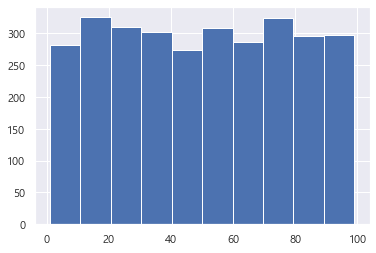

In [80]:
#히스토그램으로 생성된 데이터의 분포를 확인
plt.hist(data)
plt.show()

49.986333333333334
28.413285857538938


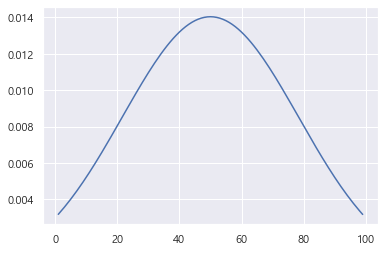

In [81]:
#data 의 정규분포 확인
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

#확률 밀도 함수 생성
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

-4.263256414560601e-17
1.0


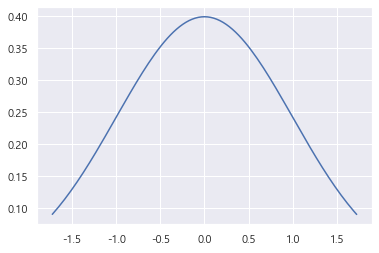

In [82]:
#표준 정규분포(z분포)로 변환
std_list = []

for i in data : 
    z = (i -data_mean)/ data_std
    std_list.append(z)
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

50.022259136212625
28.432583366441733


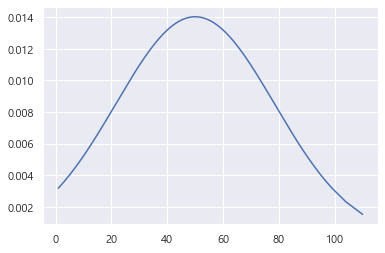

In [83]:
#이상값 추가
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)

#이상값이 추가된 데이터의 정규분포도    
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

-2.3606070955485057e-17
0.9999999999999998


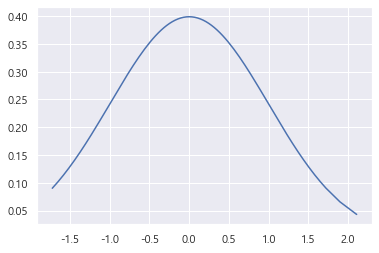

In [84]:
#이상값 추가된 데이터의 표준화

ol_std_list = []

for i in ol_data :
    z= (i-ol_data_mean)/ ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [85]:
#전체 라인 수 확인
len(ol_std_list)

3010

In [86]:
#-2부터 2의 범위 벗어나면 이상값으로 제거

for i in ol_std_list :
    z= i
    if z > 2 :
        ol_std_list.remove(z)
    if z < -2 :
        ol_std_list.remove(z)

In [87]:
#이상값 제거 후 라인 수 
len(ol_std_list)

3009

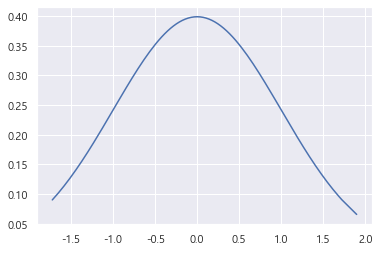

In [88]:
#이상값 제거 후 표준정규분포 확인
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [89]:
#이상값 데이터 생성
boxdata = pd.DataFrame(np.random.randn(100, 3), columns = ["A열", "B열", "C열"])

In [90]:
boxdata.head()

,A열,B열,C열
0,-1.360893,0.298199,0.477250
1,0.316269,1.393906,-0.328614
2,2.057384,0.958716,0.119266
3,0.354938,-0.613089,-0.794052
4,0.356469,1.082648,0.107814


In [92]:
#이상값 데이터 확인
#기술 통계 정보로 pencentile 확인
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,0.116798,0.020542,0.142545
std,1.017125,0.920994,1.028074
min,-1.811884,-2.358426,-1.942556
25%,-0.737594,-0.576304,-0.674900
50%,0.170678,0.038998,0.084081
75%,0.920149,0.681618,0.889032
max,2.499412,1.961347,2.984566


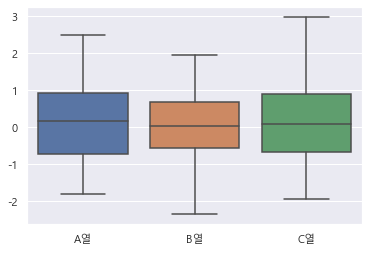

In [93]:
#박스 플롯 이용한 이상값 확인
sns.boxplot(data=boxdata)
plt.show()

In [95]:
#이상값 계산하는 함수
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column]<lowest)| (df[column]>highest)].index
    return outlier_idx

In [96]:
#함수 사용해서 이상값 확인
outlier_idx = get_outlier(df=boxdata, column='B열', weight=1.5)

In [97]:
outlier_idx

Int64Index([], dtype='int64')

In [98]:
#이상값 삭제
boxdata.drop(outlier_idx, axis=0, inplace=True)
boxdata.shape

(100, 3)

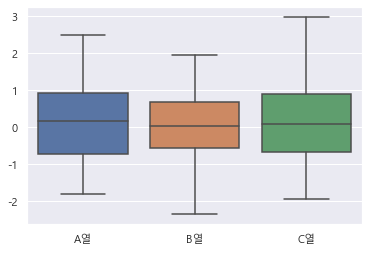

In [99]:
#박스 플롯을 이용한 이상값 확인
sns.boxplot(data=boxdata)
plt.show()

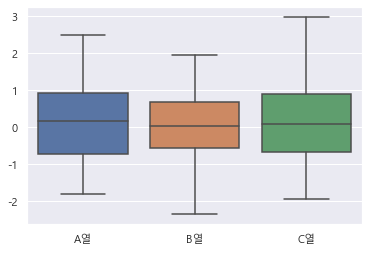

In [100]:
#함수 사용해 이상값 확인
outlier_idx = get_outlier(df=boxdata, column = 'A열', weight=1.5)
outlier_idx

#이상값 삭제
boxdata.drop(outlier_idx, axis=0, inplace = True)
boxdata.shape

#박스 플롯을 이용한 이상값 확인
sns.boxplot(data=boxdata)
plt.show()

In [101]:
#분석 변수 처리-변수 선택
#변수 선택 기법 실습

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name == 'nt' : 
    font_family = "Malgun Gothic"
    
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [103]:
#iris 붓꽃 데이터 로드
from sklearn.datasets import load_iris
iris = load_iris()
#상세정보 소환은 print(iris.DESCR)

In [104]:
#붓꽃 데이터 특성 확인
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [105]:
#데이터 프레임 변환
#데이터 생성 및 준비
df = pd.DataFrame(iris.data, columns= iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)
df['species']=sy

#필터명 정의
cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [106]:
#필터 기법 이용한 변수 선택
#분산을 이용한 필터 기법 - VarianceThreshold : 분산이 기준치보다 낮은 특징의 데이터는 사용하지 않는 방법
from sklearn.feature_selection import VarianceThreshold

In [107]:
#분산 스레스 홀더 생성
selector = VarianceThreshold()

#Threshold 설정 없이 분산 산출
selector.fit(df[cols])

print(selector.variances_)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [108]:
#threshold 설정
selector.set_params(threshold = 0.6)

#refit and transform
v_sel=selector.fit_transform(df[cols])

#분산확인
print(selector.variances_)

#분산이 임계치보다 낮은 feature 확인(True:높음, False:낮음)

[0.68112222 0.18871289 3.09550267 0.57713289]


In [109]:
#특성 필터하여 데이터프레임에 저장
iris_sel_df = df.iloc[:, [0,2]]
iris_sel_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [111]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [112]:
#상관계수 생성
cor = df.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


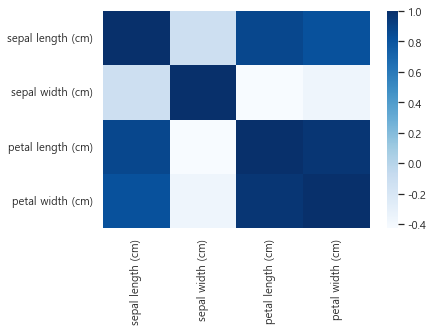

In [113]:
#히트맵으로 상관관계 가시화
sns.heatmap(cor, annot = False, cmap = plt.cm.Blues)
plt.show()

In [116]:
#속성의 상관관계 정의
cor_target = abs(cor['sepal length (cm)'])
print(cor_target)

sepal length (cm)    1.000000
sepal width (cm)     0.117570
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [117]:
#상관관계가 0.6보다 큰 속성 확인
cor_target[cor_target >0.6]

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64

In [118]:
#상관관계가 0.6보다 큰 속성 확인
selected_cols = cor_target[cor_target > 0.6]
print("상관관계 계수 > 0.6인 속성")
print(selected_cols)

상관관계 계수 > 0.6인 속성
sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [119]:
selected_cols.index

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [120]:
df[selected_cols.index].head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [121]:
df_cor_sel = df[selected_cols.index]
df_cor_sel.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
